In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import missingno as msno
import seaborn as sns

In [3]:
path = '/Users/yujiaxie/Desktop/Capstone/'
path

'/Users/yujiaxie/Desktop/Capstone/'

In [7]:
household_df = pd.read_csv(path+"household/household_data_1min_singleindex.csv",parse_dates=['utc_timestamp'])
timeseries_df = pd.read_csv(path+"timeseries/time_series_15min_singleindex.csv",parse_dates=['utc_timestamp','cet_cest_timestamp'])
weather_df = pd.read_csv(path+"weather/weather_data.csv",parse_dates=['utc_timestamp'])

/Users/yujiaxie/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (70) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [27]:
print('Total number of missing entries in household_df = {}'.format(household_df.isna().sum().sum()))
print('Total number of missing entries in timeseries_df = {}'.format(timeseries_df.isna().sum().sum()))
print('Total number of missing entries in weather_df = {}'.format(weather_df.isna().sum().sum()))


Total number of missing entries in household_df = 89437448
Total number of missing entries in timeseries_df = 1295838
Total number of missing entries in weather_df = 0


### No missing value in weather, let's see if there are any missing patterns in household and timeseries

In [8]:
household = household_df.copy()

industrial1_cL = ['utc_timestamp', 'cet_cest_timestamp']
industrial2_cL = ['utc_timestamp', 'cet_cest_timestamp']
industrial3_cL = ['utc_timestamp', 'cet_cest_timestamp']
public1_cL = ['utc_timestamp', 'cet_cest_timestamp']
public2_cL = ['utc_timestamp', 'cet_cest_timestamp']
residential1_cL = ['utc_timestamp', 'cet_cest_timestamp']
residential2_cL = ['utc_timestamp', 'cet_cest_timestamp']
residential3_cL = ['utc_timestamp', 'cet_cest_timestamp']
residential4_cL = ['utc_timestamp', 'cet_cest_timestamp']
residential5_cL = ['utc_timestamp', 'cet_cest_timestamp']
residential6_cL = ['utc_timestamp', 'cet_cest_timestamp']
for c in household.columns:
    if 'industrial1' in c:
        industrial1_cL.append(c)
    if 'industrial2' in c:
        industrial2_cL.append(c)
    if 'industrial3' in c:
        industrial3_cL.append(c)
    if 'public1' in c:
        public1_cL.append(c)
    if 'public2' in c:
        public2_cL.append(c)
    if 'residential1' in c:
        residential1_cL.append(c)
    if 'residential2' in c:
        residential2_cL.append(c)
    if 'residential3' in c:
        residential3_cL.append(c)
    if 'residential4' in c:
        residential4_cL.append(c)
    if 'residential5' in c:
        residential5_cL.append(c)
    if 'residential6' in c:
        residential6_cL.append(c)
industrial1 = household[industrial1_cL]
industrial2 = household[industrial2_cL]
industrial3 = household[industrial3_cL]
public1 = household[public1_cL]
public2 = household[public2_cL]
residential1 = household[residential1_cL]
residential2 = household[residential2_cL]
residential3 = household[residential3_cL]
residential4 = household[residential4_cL]
residential5 = household[residential5_cL]
residential6 = household[residential6_cL]

In [9]:
dirty_household_dfL = [industrial1, industrial2, industrial3,
                      public1, public2,
                      residential1, residential2, residential3, residential4, residential5, residential6]
nameL = ['industrial1', 'industrial2', 'industrial3',
        'public1', 'public2',
        'residential1', 'residential2', 'residential3', 'residential4', 'residential5', 'residential6']

household_dfL = []
for i,df in enumerate(dirty_household_dfL):
    clean_df = df.dropna(subset=[c for c in df.columns if c not in ['utc_timestamp', 'cet_cest_timestamp']], how='all')
    clean_df.name = nameL[i]
    household_dfL.append(clean_df)

In [ ]:
fig, ax = plt.subplots(3,4, figsize=(25, 25))
for df, subplot in zip(household_dfL, ax.flatten()):
    tmp = df.loc[:, ~df.columns.isin(['utc_timestamp', 'cet_cest_timestamp'])]    
    sns.heatmap(tmp.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'},
            ax=subplot
           );

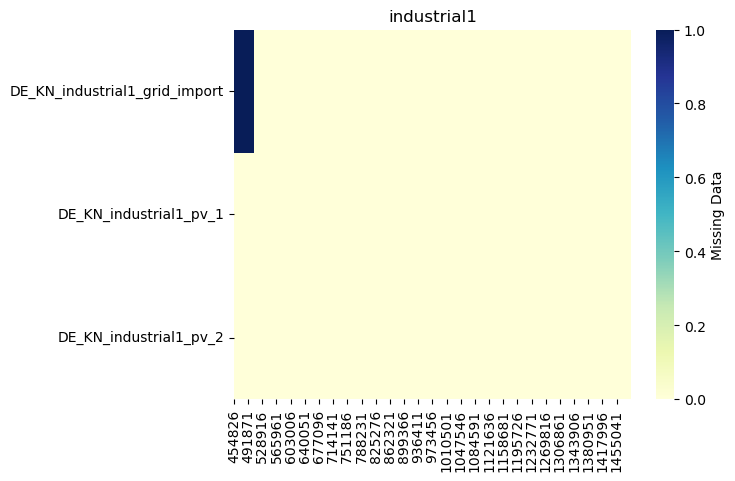

In [13]:
tmp = household_dfL[0].loc[:, ~household_dfL[0].columns.isin(['utc_timestamp', 'cet_cest_timestamp'])]
sns.heatmap(tmp.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}).set(title=household_dfL[0].name);


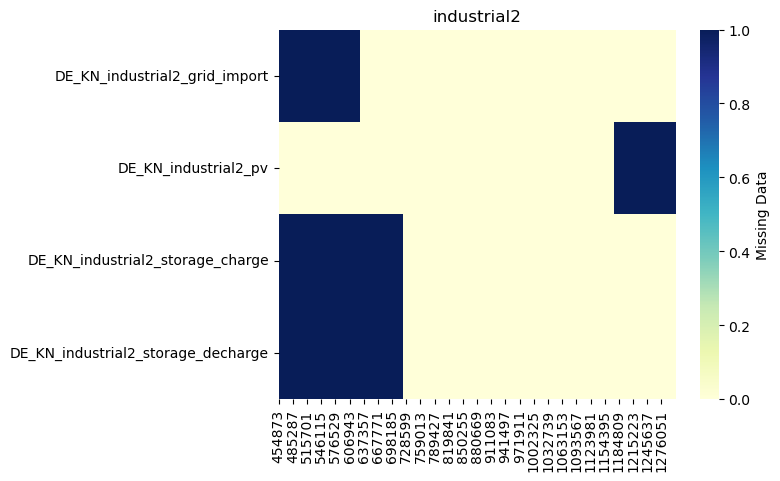

In [14]:
tmp = household_dfL[1].loc[:, ~household_dfL[1].columns.isin(['utc_timestamp', 'cet_cest_timestamp'])]
sns.heatmap(tmp.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}).set(title=household_dfL[1].name);

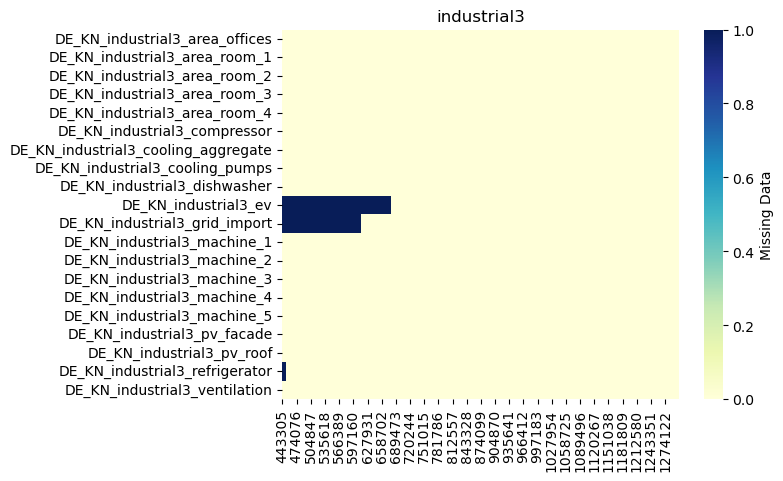

In [15]:
tmp = household_dfL[2].loc[:, ~household_dfL[2].columns.isin(['utc_timestamp', 'cet_cest_timestamp'])]
sns.heatmap(tmp.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}).set(title=household_dfL[2].name);

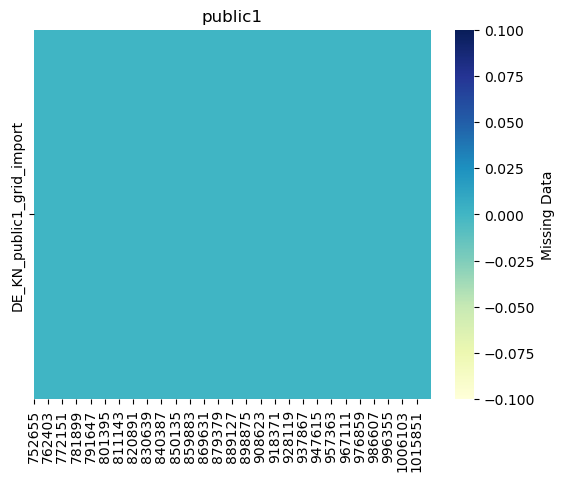

In [16]:
tmp = household_dfL[3].loc[:, ~household_dfL[3].columns.isin(['utc_timestamp', 'cet_cest_timestamp'])]
sns.heatmap(tmp.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}).set(title=household_dfL[3].name);

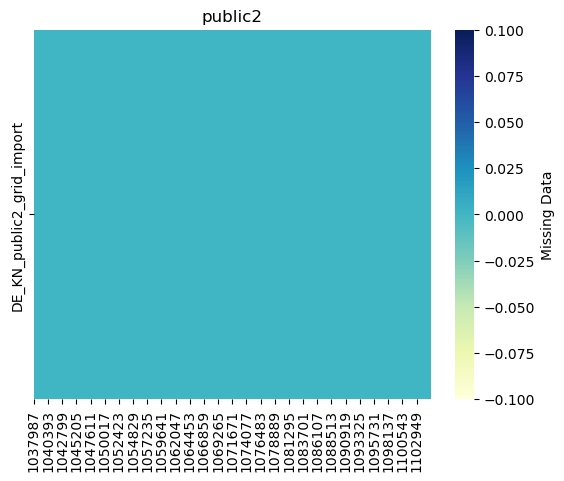

In [17]:
tmp = household_dfL[4].loc[:, ~household_dfL[4].columns.isin(['utc_timestamp', 'cet_cest_timestamp'])]
sns.heatmap(tmp.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}).set(title=household_dfL[4].name);

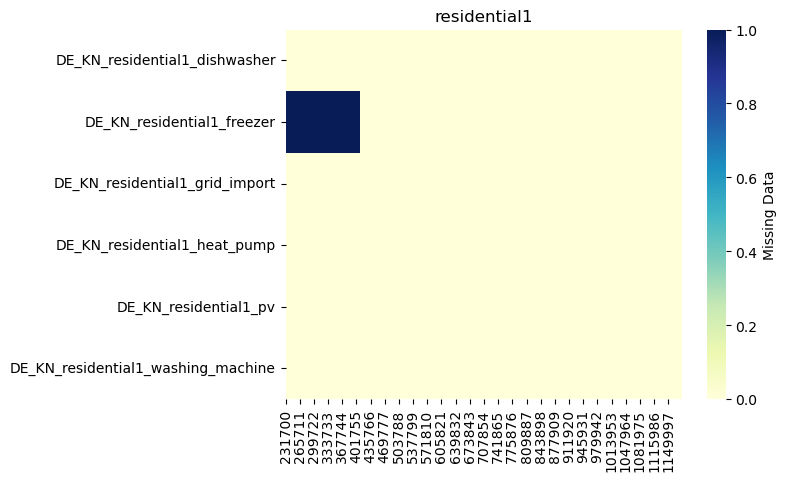

In [18]:
tmp = household_dfL[5].loc[:, ~household_dfL[5].columns.isin(['utc_timestamp', 'cet_cest_timestamp'])]
sns.heatmap(tmp.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}).set(title=household_dfL[5].name);

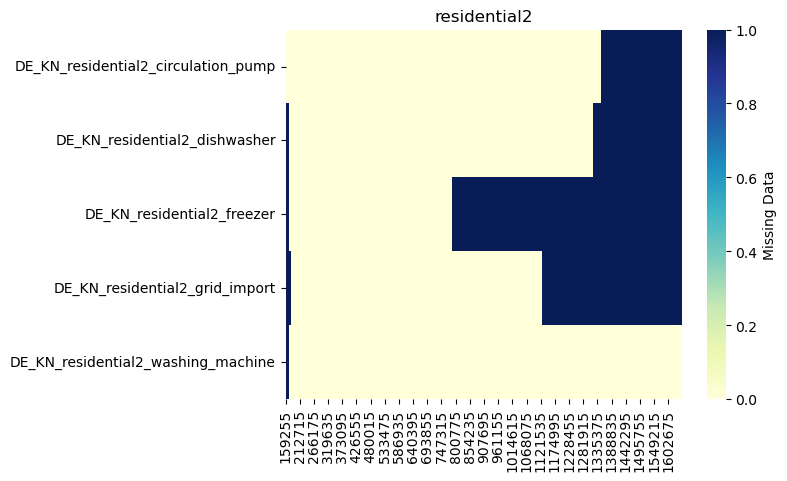

In [19]:
tmp = household_dfL[6].loc[:, ~household_dfL[6].columns.isin(['utc_timestamp', 'cet_cest_timestamp'])]
sns.heatmap(tmp.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}).set(title=household_dfL[6].name);

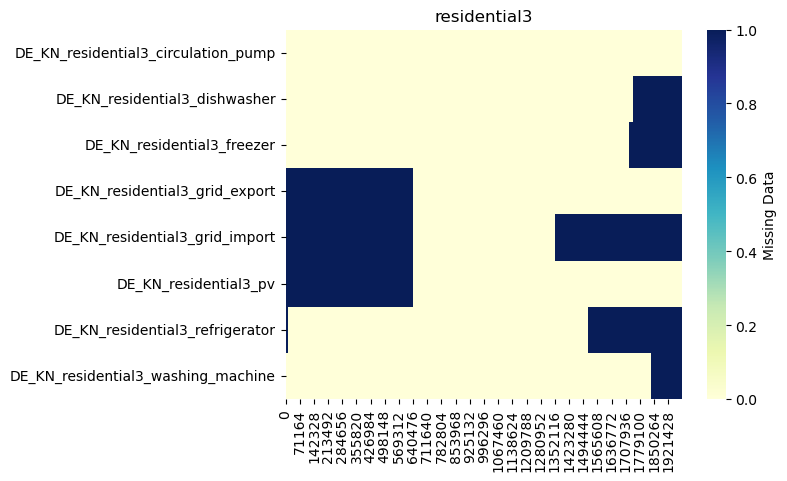

In [20]:
tmp = household_dfL[7].loc[:, ~household_dfL[7].columns.isin(['utc_timestamp', 'cet_cest_timestamp'])]
sns.heatmap(tmp.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}).set(title=household_dfL[7].name);

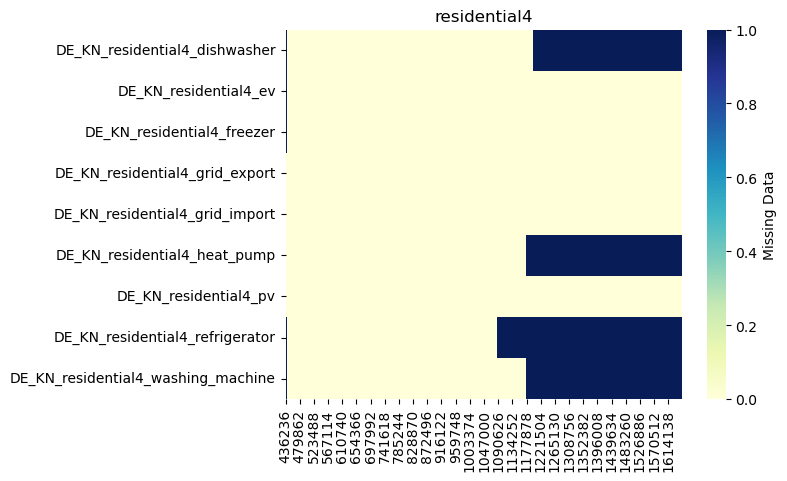

In [21]:
tmp = household_dfL[8].loc[:, ~household_dfL[8].columns.isin(['utc_timestamp', 'cet_cest_timestamp'])]
sns.heatmap(tmp.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}).set(title=household_dfL[8].name);

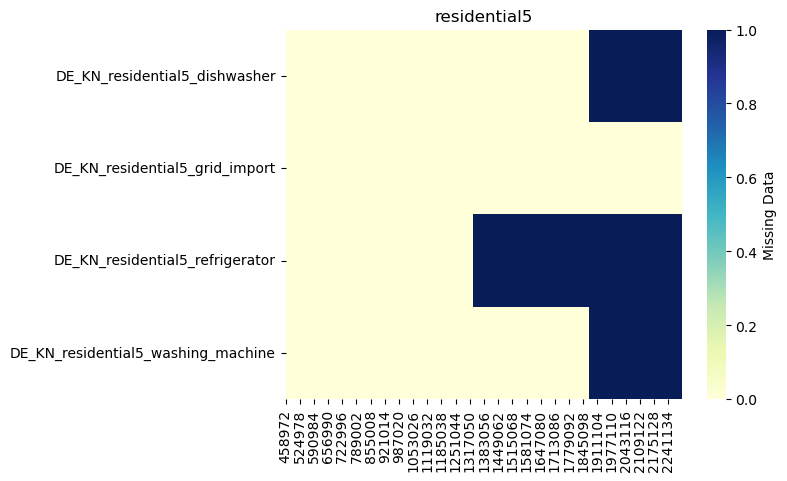

In [22]:
tmp = household_dfL[9].loc[:, ~household_dfL[9].columns.isin(['utc_timestamp', 'cet_cest_timestamp'])]
sns.heatmap(tmp.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}).set(title=household_dfL[9].name);

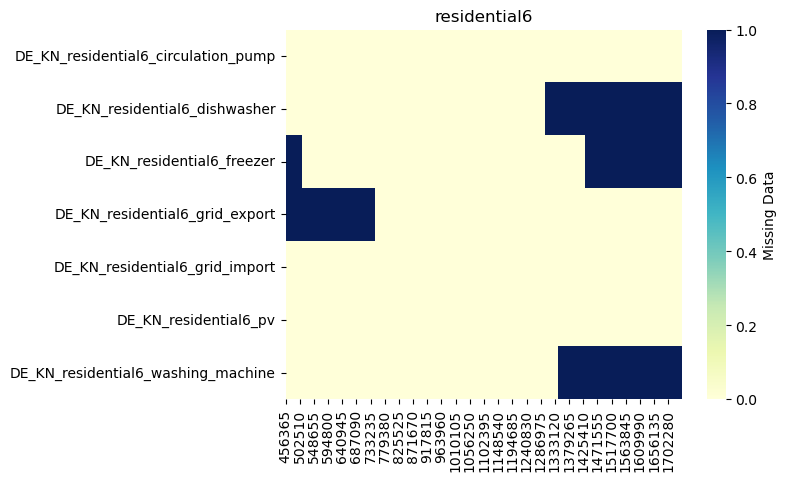

In [24]:
tmp = household_dfL[10].loc[:, ~household_dfL[10].columns.isin(['utc_timestamp', 'cet_cest_timestamp'])]
sns.heatmap(tmp.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}).set(title=household_dfL[10].name);